In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualization

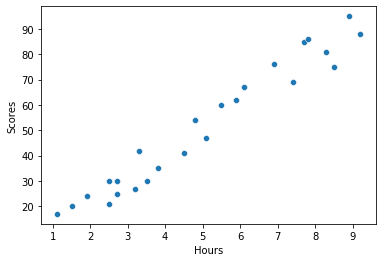

In [4]:
# Viewing the distribution of data
sns.scatterplot(x='Hours',y='Scores',data=data)

/home/ayman/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensio

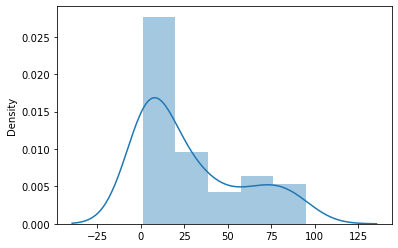

In [5]:
# Checking Normal Distribution
sns.distplot(data)

# Split and Trainning

In [6]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(train_x,train_y)

LinearRegression()

In [9]:
# Train Score
model.score(train_x,train_y)

0.9515510725211552

In [10]:
# Test Score
model.score(test_x,test_y)

0.9454906892105354

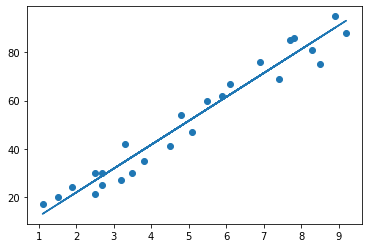

In [11]:
# Visualizing the Fitted Line
plt.scatter(x,y)
plt.plot(x,model.coef_*x+model.intercept_)
plt.show()

# Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(test_x)
mean_absolute_error(test_y,y_pred)

4.183859899002982

In [23]:
# Actual VS Predicted
df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be predicted if student studied 9.25 hours/day ?

In [27]:
y_pred = model.predict(X=[['9.25']])
print(y_pred[0])

93.69173248737539


/home/ayman/.local/lib/python3.8/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
